# Importing libraries 
 import of all necessary libraries

In [ ]:
import nltk
import numpy as np
import pandas as pd

#!pip install bertopic
from bertopic import BERTopic
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
from google.colab import drive 
drive.mount('gdrive')

In [ ]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/new_datafile.csv")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,Categories,Titles,Texts,Keywords
0,Animals,animal attack,animal attacks are violent often fatal attacks...,violent bites aggressive attack public...
1,Animals,animal coloration,animal coloration is the general appearance of...,appearance coloured camouflage incidenta...
2,Animals,animal ethics,animal ethics is branch of ethics which examin...,rights welfare law human animal cognit...
3,Animals,animal husbandry,animal husbandry is the branch of agriculture ...,agriculture day to day care selective bree...
4,Animals,animal law,animal law is combination of statutory and cas...,statutory law rights violates policies...


# Unsupervised Classification using BERTopic algorithm

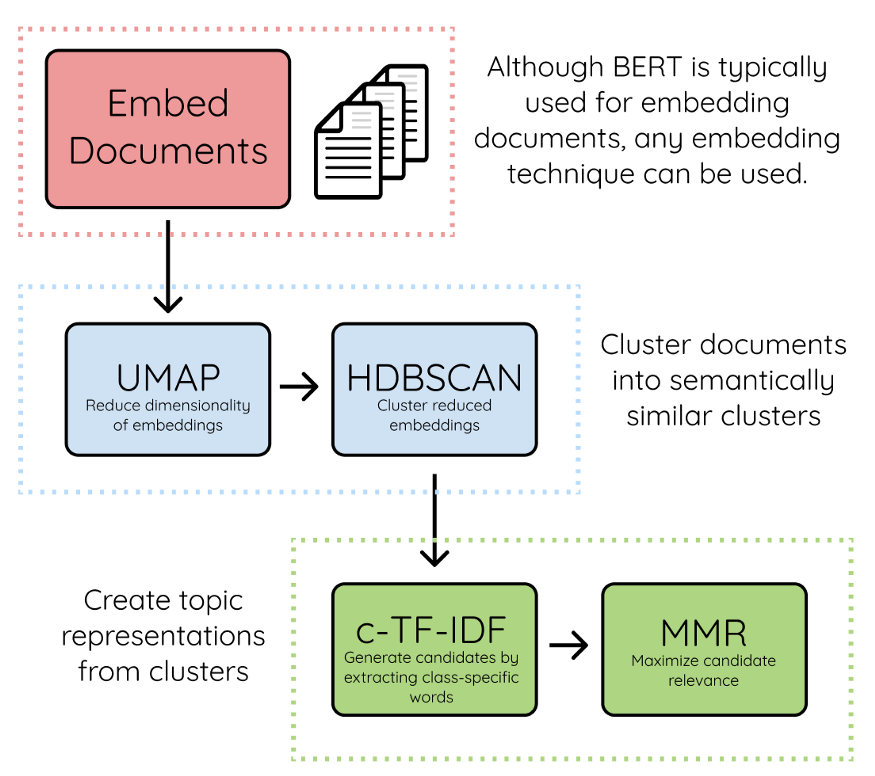

## Clusterer with HDBSCAN algorithm

### Clustrer with Keywords using HDBSCAN

In [ ]:
topic_model_keys = BERTopic(embedding_model=sbert_model, language="english", 
                             calculate_probabilities=False, 
                             min_topic_size=17,nr_topics=30,
                             n_gram_range = (1,2),
                             verbose=True)
topics_keys, _ = topic_model_keys.fit_transform(df["Keywords"])

In [ ]:
info2 = topic_model_keys.get_topic_info()
info2

,Topic,Count,Name
0,1,555,1_health_language_communication_of
1,0,29,0_music_film_band_album


In [ ]:
topics_per_class2 = topic_model_keys.topics_per_class(df["Keywords"], topics_keys, classes=df["Categories"].tolist())
fig_supervised2 = topic_model_keys.visualize_topics_per_class(topics_per_class2,top_n_topics=10)
fig_supervised2

30it [00:00, 56.70it/s]


###Clustrer with texts using HDBSCAN

In [ ]:
topic_model_hdbscan = BERTopic(embedding_model=sbert_model, language="english", 
                             calculate_probabilities=False, 
                             min_topic_size=17, 
                             n_gram_range = (1,2),
                             verbose=True)
topics_texts, _ = topic_model_hdbscan.fit_transform(df["Cleaned Texts"])

In [ ]:
info = topic_model_hdbscan.get_topic_info()
info

,Topic,Count,Name
0,0,94,0_war_state_tunisia_force
1,-1,81,-1_language_brand_marketing_earthquake
2,1,61,1_web_user_social_medium
3,2,57,2_engineering_school_engineer_vehicle
4,3,48,3_health_medicine_exercise_medical
5,4,44,4_robot_learning_ai_machine
6,5,37,5_music_metal_album_musical
7,6,31,6_animal_flood_water_area
8,7,30,7_family_child_parent_relationship
9,8,23,8_fiction_science_science fiction_series


In [ ]:
topic_model_hdbscan.visualize_topics()

In [ ]:
topics_per_class = topic_model_hdbscan.topics_per_class(df["Texts"], topics_texts, classes=df["Categories"].tolist())
fig_supervised = topic_model_hdbscan.visualize_topics_per_class(topics_per_class, top_n_topics=10)
fig_supervised

30it [00:32,  1.09s/it]


## Clusterer with K-means

In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=30)
topic_model_kmeans = BERTopic(hdbscan_model=cluster_model,
                            embedding_model=sbert_model, language="english", 
                             calculate_probabilities=False, 
                             min_topic_size=17, 
                             n_gram_range = (1,2),
                             verbose=True)
topics_sum, _ = topic_model_kmeans.fit_transform(df["Cleaned Texts"])

We note that topic number 29 contains only **7 texts**, which contradicts the minimum number of texts given (at least 17 texts in each group)

In [ ]:
info1 = topic_model_kmeans.get_topic_info()
info1.tail()

,Topic,Count,Name
25,25,14,25_health_diabetes_disease_public health
26,26,12,26_school_education_business_business school
27,27,12,27_crime_sexual_hate_discrimination
28,28,8,28_dance_dragon_sport_competition
29,29,7,29_iran_nuclear_weapon_nuclear weapon


In [ ]:
topic_model_kmeans.visualize_topics()

In [ ]:
topics_per_class1 = topic_model_kmeans.topics_per_class(df["Texts"], topics_sum, classes=df["Categories"].tolist())
fig_supervised1 = topic_model_kmeans.visualize_topics_per_class(topics_per_class1,top_n_topics=10)
fig_supervised1

30it [00:36,  1.22s/it]


In [ ]:
topic_model_kmeans.get_topic(1)

[('music', 0.03376309938914145),
 ('metal', 0.029973455418198527),
 ('album', 0.019845464887720807),
 ('musical', 0.01906141949345417),
 ('song', 0.018706157485000846),
 ('band', 0.018541860275634793),
 ('black', 0.015975936835805022),
 ('hop', 0.015600723904747761),
 ('hip', 0.015059896121926984),
 ('hip hop', 0.015013832578535304)]

# Conclusion:
We can notice that for both algorithms there are a lot of overlapping clusters which shows that there are common elements that make these clusters close to each other.